In [44]:
import matplotlib
import torchvision.transforms as transforms
import pandas as pd
import load
import sklearn
import cv2

from PIL import Image
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from loader import load_video

In [64]:
labels = pd.read_csv('../datasets/train.csv')
print(labels.head())
print(labels[labels['filename'] == '9a22372d22a52397.mp4']['label'].to_numpy()[0])

               filename  label
0  9a22372d22a52397.mp4      1
1  9bc4f1306bb8e2cd.mp4      1
2  88fe2a902a9d8cc7.mp4      1
3  1f3cbda142d0944a.mp4      1
4  63bed62257daccaf.mp4      1
1


In [60]:
print('LENGTH', len(labels))
print('FAKES', len(labels[labels['label'] == 1]))
print('REALS', len(labels[labels['label'] == 0]))

video_names = labels['filename']
# print(video_names)
split = train_test_split(labels['filename'], random_state=42, train_size=0.8)
train, test = split
train = train.to_numpy()
test = test.to_numpy()
print(train, len(train))
print(test, len(test))

LENGTH 6943
FAKES 4380
REALS 2563
['169e8728c8b4ef43.mp4' '0383c2229f09d05a.mp4' 'c3cb0ab9e5313cb2.mp4' ...
 '8932cf58a7c9766c.mp4' '395bc1589f6897f1.mp4' '97f56c8f0edef18c.mp4'] 5554
['fb1d15ce0eb1e68c.mp4' '8f7ecc23e031b829.mp4' '05f01e4183c6d94b.mp4' ...
 '92d829282303147e.mp4' 'e11529fa346c69f3.mp4' 'b78b0f8af7944f3e.mp4'] 1389


In [27]:
path = '../datasets/train/videos/tmc_train_00/0ae95b34e9481b4f.mp4'
video = cv2.VideoCapture(path)

width = video.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`
frames = video.get(cv2.CAP_PROP_FRAME_COUNT)  # float `height`
print(type(video))

output = load_video(video, every_n_frames=10, rescale=0.25)
out_video = output[0]

print(f'OUT TYPE: {type(out_video)}')
print(f'RES: {width} {height} FRAMES: {frames}')

<class 'cv2.VideoCapture'>
OUT TYPE: <class 'numpy.ndarray'>
RES: 1080.0 1920.0 FRAMES: 1473.0


In [28]:
out_video.shape


(148, 480, 270, 3)

(480, 270, 3)


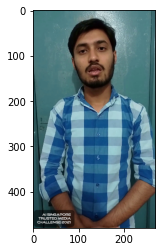

In [65]:
frame = out_video[56]
print(frame.shape)
%matplotlib inline
imshow(frame)

In [31]:
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])